In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
import protfasta
from sparrow import Protein


In [2]:
sequence_groups = ['GSNHQT','DERK', 'GPED', 'DERKQNSTHG','YFWILVMA','ILVMA', 'ED', 'RK', 'GP', 'YFW', ]

def return_patterning_scores(seq):
    """
    Returns the patterning scores for a given sequence and sequence group.
    """
    # Initialize Protein objects once per sequence

    # build a dictionary of protein objects
    protein_objs = {k: Protein(seq) for k, seq in seqs.items()}

    all_patterning_scores = []
    for k in seqs:
        tmp = []
        for s in sequence_groups:
            tmp.append(protein_objs[k].compute_kappa_x(s))

        tmp.append(protein_objs[k].kappa)
        all_patterning_scores.append(tmp)

    # Convert to numpy array for easier manipulation
    all_patterning_scores = np.array(all_patterning_scores)
    
    return all_patterning_scores

group_names = sequence_groups.copy()
group_names.append('Kappa')


### Global shuffle patterning

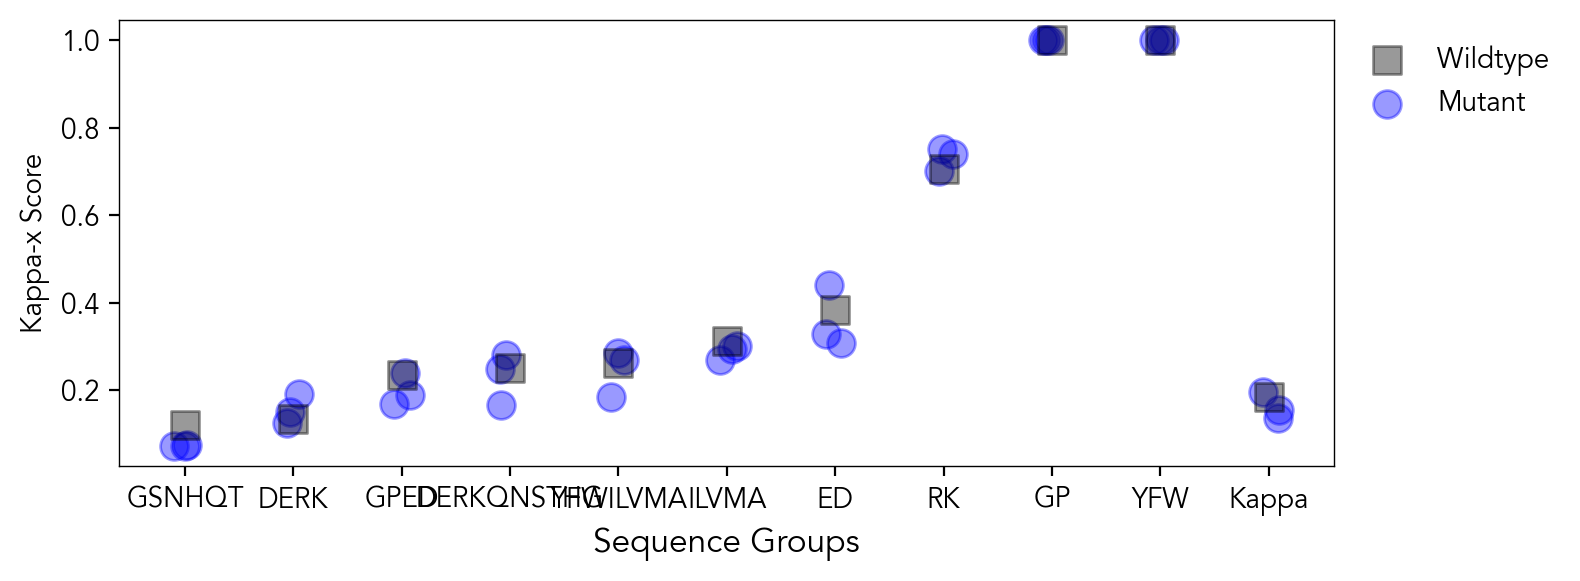

In [3]:

seqs = {}

seqs['WT']    = 'NNNNNNDGELSGTNLRSNSIDYAKHQEISSAGTSSNTTKNVNNNKNDSNDDNNGNNNNDASNLMESVLDKTSSHRYQPKKMPSVNKWSKPDQITHSDVSMVGLDESNDGGNENVHPTLAEVDAQEARETAQLAIDKINSYKRSIDDKNGDGHNNSSRNVVDENLINDMDSEDAHKSKRQHLSDITLEERNEDDKLPHEVAEQLRLLSSHLKEVE'
seqs['VC_S1'] = 'TNNIESKKTNEGESLDNELSDNKDNQIMRQAGSSNDKEKKKMDESNLTKISSSGDTSNDALGLVEVNQRISEANNYQPIPDPSVNKNPISLTHIESNKDENGLDHSNDNGVNDVHPWLASVDAQNADELANLAEVKNDLNHRRDSETHGDKHGSSNNDVVDNSLINNMYDDKAHKNSRQELTNNTSNEKNHDDGHESRVASQLRRLSTMSNYVE'
seqs['VC_S2'] = 'TKNIPHRTNINGSNLNSVSSPKNWNQNSNNAGESEVQNDESLNKLSDNEDHEDGMDESLAHTLEELKNNNESKDTYQPNNSPSVGEGETSSHSDDHRNLDSGLDKIETGGNYAVHPNLAQVDAQSAKNSARLANDENNNINRSYNKKSGDIHDTSLSRVVDDKLESDMMNHNAHKINRQKLDDDTDTKNSIDNMKSSDVAEQLRELVINKVRVE'
seqs['VC_S3'] = 'PHNSENNKEKYGIILLEDTNKRQTVQSSKHAGNNVHDDPTSIDGNNNSKSNENGDSLNDAEMLKENSVGTRDHSVYQPKRIPSVENDENSNDENSLSNSKEGLDSTIINGNSNVHPKLANVDAQMASDNANLADLSAKEKDRNNDSMSGDLHYNSTSRVVIENLETEMIQDLAHKGDRQWLDNNTKSRNSKDENKDDTVAEQLRNLSSDHHNVE'

seq_patterning_scores = return_patterning_scores(seqs).transpose()

plt.figure(figsize=(8, 3))

for i, scores in enumerate(seq_patterning_scores):
    # Jitter for each point
    x_jitter = np.random.uniform(-0.1, 0.1, size=4)
    x_vals = i + x_jitter

    # Wildtype (square)
    plt.scatter(i, scores[0], marker='s', color='black', s=100, label='Wildtype' if i == 0 else "", zorder=3, alpha=0.4)
    
    # Mutants (circles)
    plt.scatter(x_vals[1:], scores[1:], marker='o', color='blue', s=100, label='Mutant' if i == 0 else "", zorder=2, alpha=0.4)

plt.xticks(range(len(seq_patterning_scores)), group_names)
plt.ylabel('Kappa-x Score')
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Sequence Groups', fontsize=12)

plt.tight_layout()
plt.savefig('figures/idr2_shuffle_kappa_x_scores.pdf', bbox_inches='tight')

## Gal4 shuffles

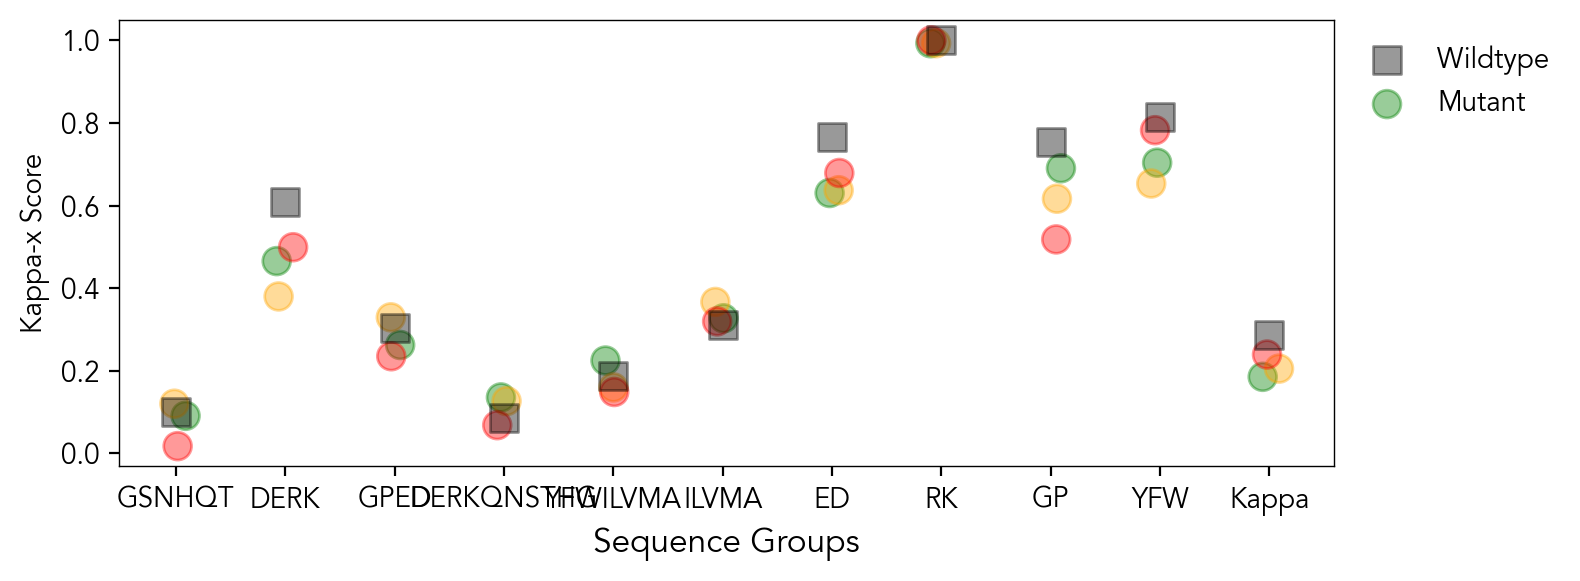

In [4]:

seqs = {}

seqs['WT']    = 'ANFNQSGNIADSSLSFTFTNSSNGPNLITTQTNSQALSQPIASSNVHDNFMNNEITASKIDDGNNSKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDTPPNPKKE'
seqs['GAL4_global_shuffle_1'] = 'AQDILNYNSDIYKTFTTSAFMSNPLYQETSNFTAPDGKNSIFDATVFWTTSAGENDTNNGNLQVQGSINQSNSTITHNPKPGTGNSDNPNKFSNDLAMFLDMTPPNIAEDSTSD'
seqs['GAL4_global_shuffle_2'] = 'FTNNNSFNDPVALNSDNYQNGISSQSGDIFNLLDATDTTTGASKDDSTFPDEPQSWIMKSGSSIDNHNTSNTFGNETFTAYQKMLIAYANSKATQFIEPDPPGNVPNNLNTTMT'
seqs['GAL4_global_shuffle_3'] = 'NFTTKMTIGLDFNAISNKSSEGIDPTDDNPMAQNTDVTKFQSQDGMSTANNLSPAGLFSPTLYTWPINTSAGSYNEDNPNNTDTLTISANFQYDSSPKQNFEDNHITNAGVFSN'



seq_patterning_scores = return_patterning_scores(seqs).transpose()
        

plt.figure(figsize=(8, 3))

name2color = {}
name2color['GAL4_global_shuffle_1'] = 'green'
name2color['GAL4_global_shuffle_2'] = 'orange'
name2color['GAL4_global_shuffle_3'] = 'red'
colors = list(name2color.keys())
for i, scores in enumerate(seq_patterning_scores):
    # Jitter for each point
    x_jitter = np.random.uniform(-0.1, 0.1, size=4)
    x_vals = i + x_jitter

    # Wildtype (square)
    plt.scatter(i, scores[0], marker='s', color='black', s=100, label='Wildtype' if i == 0 else "", zorder=3, alpha=0.4)
    
    # Mutants (circles, colored)
    mutant_colors = [name2color[c] for c in colors]
    plt.scatter(x_vals[1:], scores[1:], marker='o', c=mutant_colors, s=100, label='Mutant' if i == 0 else "", zorder=2, alpha=0.4)

plt.xticks(range(len(seq_patterning_scores)), group_names)
plt.ylabel('Kappa-x Score')
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Sequence Groups', fontsize=12)

plt.tight_layout()
plt.savefig('figures/gal4_shuffle_kappa_x_scores.pdf', bbox_inches='tight')

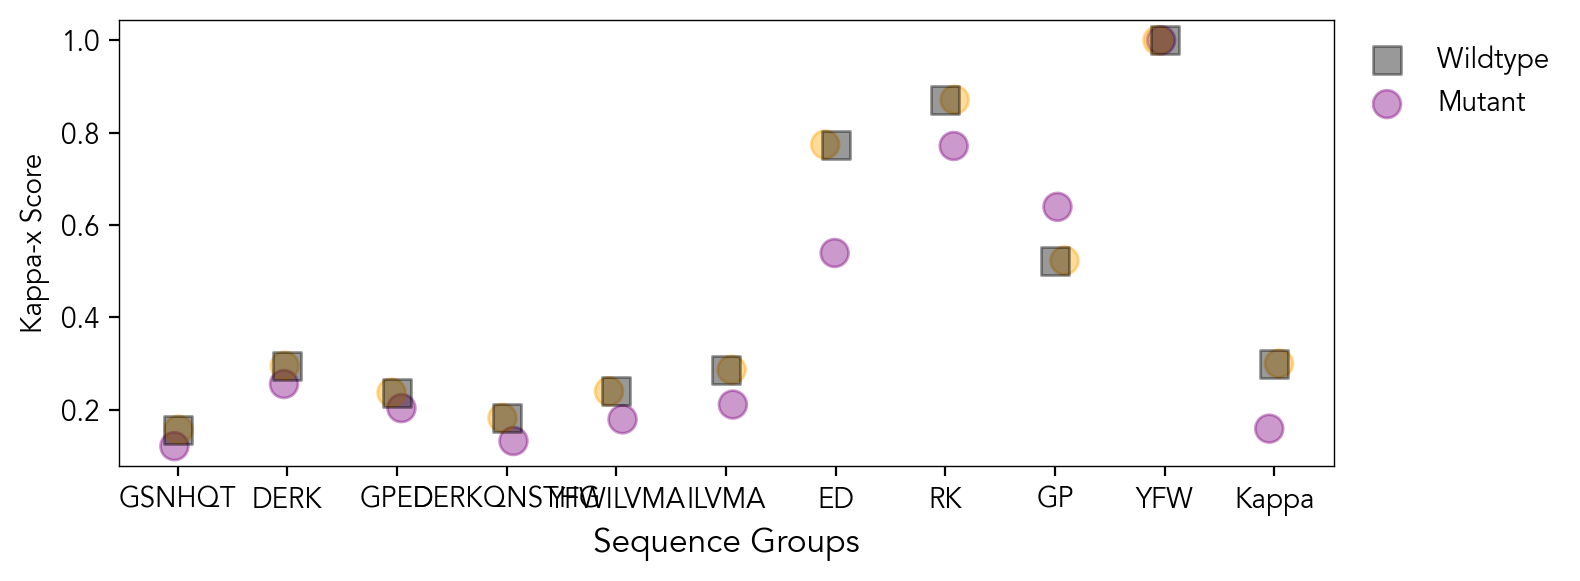

In [5]:
seqs = {}

seqs['WT']    = 'MGRTTSEGIHGFVDDLEPKSSILDKVGDFITVNTKRHDGREDFNEQNDELNSQENHNSSENGNENENEQDSLALDDLDRAFELVEGMDMDWMMPSHAHHSPATTATIKPRLLYSPLIHTQSAVPVTISPNLVATATSTTSANKVTKNKSNSSPYLNKRRGKPGPDSATSLFELPDSVIPTPKPKPKPKQYPKVILPSNSTRRVSPVTAKTSSSAEGVVVASESPVIAPHGSSHSRSLSKRRSSGALVDD'
seqs['shuff'] = 'NFSSNTTNSYEKLHESISEPRNSARSKENRHPGPVRPKVPERRLPDDTDTNVAITVHSSGQGQLNPTTAFVTPDAMSLSSVDVPGETPDEAIDYSTFIWDINGAVEGSKTSSLDRVALSTKHSTADKSVNKKDSGKHGANKLETPNKTLVSLHSRSEKFMGNSVTNSARPPSLLYLDSKQLPKKSIPIPTEAKRHQSSEIQLVFPLESDLNHHSDGTRPPNAEIGPMNTVDAESLVSAVPAGMMVDSRD'
seqs['seg_shuff'] = 'MGRTTSEGIHGFVDDLEPKSSILDKVGDFITVNTKRHDGREDFNEQNDELNSQENHNSSENGNENENEQDSLALDDLDRAFELVEGMDMDWMMPSHAHHSPATTATIKPRLLYSPLIHTQSAVPVTISPNLVATATSTTSANKVTKNKSNSSPYLNKRRGKPGPDSATSLFELPDSVIPTPKPKPKPKQYPKVILPSNSTRRVSPVTAKTSSSAEGVVVASESPVIAPHGSSHSRSLSKRRSSGALVDD'


seq_patterning_scores = return_patterning_scores(seqs).transpose()

plt.figure(figsize=(8, 3))

name2color = {}
name2color['shuff'] = 'purple'
name2color['seg_shuff'] = 'orange'
colors = list(name2color.keys())
for i, scores in enumerate(seq_patterning_scores):
    # Jitter for each point
    x_jitter = np.random.uniform(-0.1, 0.1, size=len(scores))
    x_vals = i + x_jitter

    # Wildtype (square)
    plt.scatter(i, scores[0], marker='s', color='black', s=100, label='Wildtype' if i == 0 else "", zorder=3, alpha=0.4)
    
    # Mutants (circles)
    mutant_colors = [name2color[c] for c in colors]
    plt.scatter(x_vals[1:], scores[1:], marker='o', color=mutant_colors, s=100, label='Mutant' if i == 0 else "", zorder=2, alpha=0.4)

plt.xticks(range(len(seq_patterning_scores)), group_names)
plt.ylabel('Kappa-x Score')
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Sequence Groups', fontsize=12)

plt.tight_layout()
plt.savefig('figures/pho4_shuffle_kappa_x_scores.pdf', bbox_inches='tight')